#  Task E

In [1]:
import numpy as np
import matplotlib.pyplot as plt


 x(t) = 3+sin2πt+0.5sin10πt+0.05sin30πt

In [2]:
def x(t):
  return 3 + np.sin(2 * np.pi * t) + 0.5 * np.sin(10 * np.pi * t) + 0.05 * np.sin(30 * np.pi * t)

 The following Python code samples a continuous-time signal
 at a sampling rate of 128 Hz:

In [3]:
# Sampling rate
#  sr = 128
# Sampling interval
#  ts = 1.0/sr
#  t = np.arange(0,1,ts)
#  x = 3
#  x += 1*np.sin(2*np.pi*1*t)
#  x += 0.5*np.sin(2*np.pi*5*t)
#  x += 0.05*np.sin(2*np.pi*15*t)

In [4]:
# Sampling rate
sr = 128
# Sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)
x_sampled = x(t)

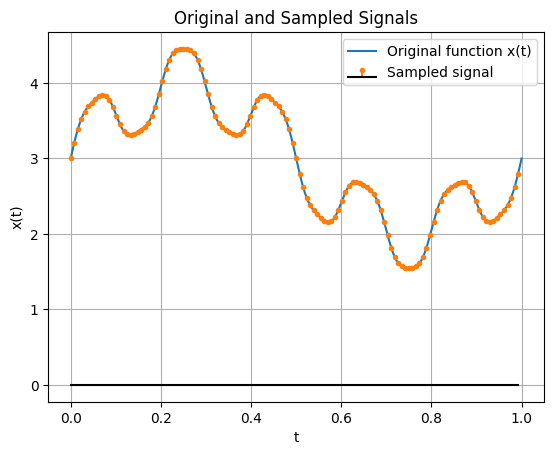

In [5]:
t_smooth = np.linspace(0, 1, 500)
x_smooth = x(t_smooth)

# Plot the original function
plt.plot(t_smooth, x_smooth, label='Original function x(t)')

# Plot the sampled signal
markerline, stemlines, baseline = plt.stem(t, x_sampled, linefmt='C1-', markerfmt='C1o', basefmt='k-', label='Sampled signal')

plt.setp(stemlines, visible=False)

plt.setp(markerline, markersize=3)


plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Original and Sampled Signals')
plt.legend()
plt.grid(True)
plt.show()

# (a) DFT Spectrum Analysis of x[n]

**• Using your function gen_DFT_matrix(N) with N = 128, compute the DFT of x[n].**

Generates the N x N DFT matrix.

In [6]:
def gen_DFT_matrix(N):
  dft_matrix = np.zeros((N, N), dtype=complex)
  for k in range(N):
    for n in range(N):
      dft_matrix[k, n] = np.exp(-2j * np.pi * k * n / N)
  return dft_matrix

Compute dft

In [7]:
dft_matrix_128 = gen_DFT_matrix(128)
X_dft = np.dot(dft_matrix_128, x_sampled)

Calculate the magnitude spectrum, generate the frequency axis, and plot the magnitude spectrum against the frequency.



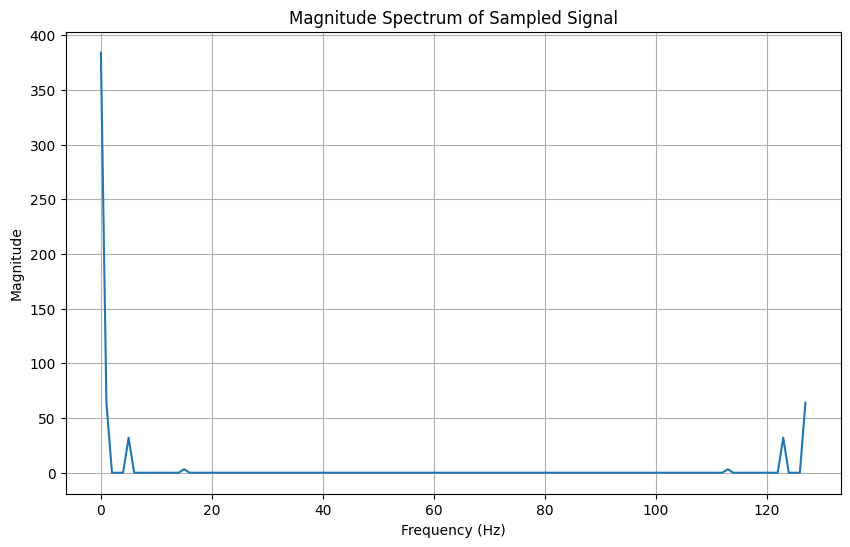

In [8]:
X_magnitude = np.abs(X_dft)

N = len(x_sampled)
frequencies = np.arange(N) * (sr / N)

plt.figure(figsize=(10, 6))
plt.plot(frequencies, X_magnitude)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Magnitude Spectrum of Sampled Signal")
plt.grid(True)
plt.show()

Signal Reconstruction from DFT

• Compute the Inverse DFT (IDFT) of X[k] to reconstruct the sampled signal x[n].

Generate the N x N IDFT matrix.

In [9]:
def gen_IDFT_matrix(N):
    idft_matrix = np.zeros((N, N), dtype=complex)
    for n in range(N):
        for k in range(N):
            idft_matrix[n, k] = np.exp(2j * np.pi * n * k / N)
    return idft_matrix / N

Compute the IDFT.

In [10]:
N = len(X_dft)
idft_matrix_128 = gen_IDFT_matrix(N)
x_reconstructed = np.dot(idft_matrix_128, X_dft)

x_reconstructed = np.real(x_reconstructed)

• Plot the original sampled signal x[n] and the reconstructed signal on the same graph.

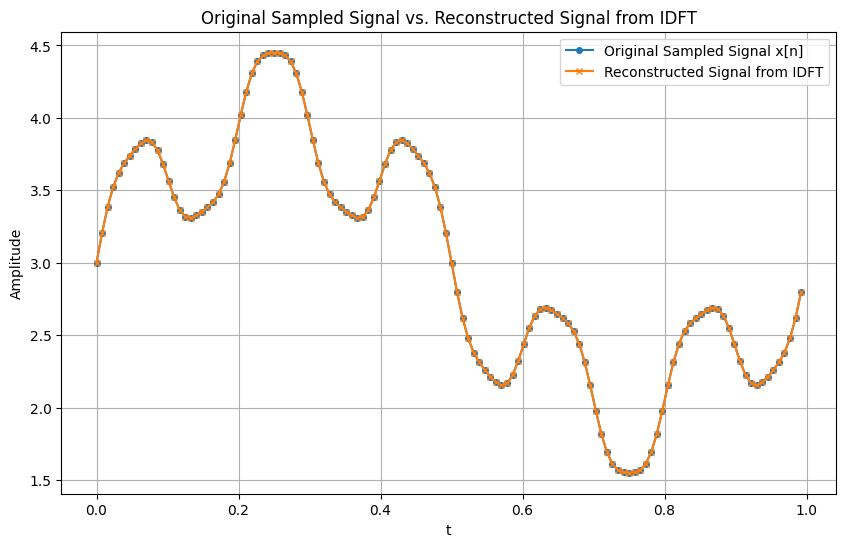

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(t, x_sampled, 'o-', label='Original Sampled Signal x[n]', markersize=4)
plt.plot(t, x_reconstructed, 'x-', label='Reconstructed Signal from IDFT', markersize=4)
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.title("Original Sampled Signal vs. Reconstructed Signal from IDFT")
plt.legend()
plt.grid(True)
plt.show()

**• Plot the magnitude spectrum |X[k]| as a function of frequency in Hz (up to sr/2).**

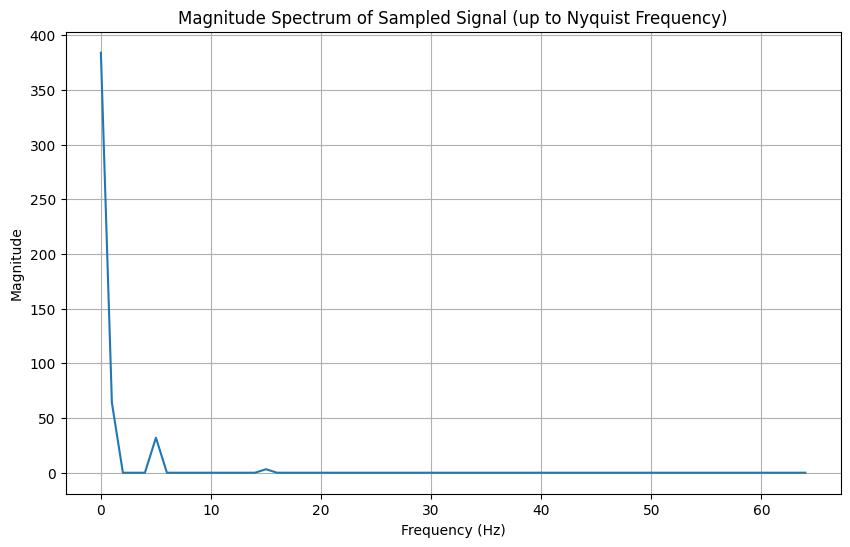

In [12]:
N = len(x_sampled)
frequencies = np.arange(N) * (sr / N)

# Only plot up to sr/2 (the Nyquist frequency)
nyquist_frequency = sr / 2
frequencies_half = frequencies[:int(N/2) + 1]
X_magnitude_half = X_magnitude[:int(N/2) + 1]

plt.figure(figsize=(10, 6))
plt.plot(frequencies_half, X_magnitude_half)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Magnitude Spectrum of Sampled Signal (up to Nyquist Frequency)")
plt.grid(True)
plt.show()

**• Verify that the spectrum shows clear peaks at the constituent frequencies of x(t). Do the peak amplitudes correspond to
 the expected amplitudes in x(t)?**

Identify the constituent frequencies from the definition of x(t) <br>
x(t) = 3 + sin(2πt) + 0.5sin(10πt) + 0.05sin(30πt) <br>
*The frequencies are 1 Hz, 5 Hz, and 15 Hz.*

In [13]:
expected_frequencies = [1, 5, 15]
expected_amplitudes = [1, 0.5, 0.05]

In [14]:
peak_indices = [np.argmin(np.abs(frequencies_half - freq)) for freq in expected_frequencies]
peak_magnitudes = X_magnitude_half[peak_indices]

In [15]:
print(f"Expected Frequencies (Hz): {expected_frequencies}")
print(f"Frequencies in spectrum closest to expected: {frequencies_half[peak_indices]}")
print(f"Magnitudes at these frequencies: {peak_magnitudes}")

Expected Frequencies (Hz): [1, 5, 15]
Frequencies in spectrum closest to expected: [ 1.  5. 15.]
Magnitudes at these frequencies: [64.  32.   3.2]


Plot the magnitude spectrum with peaks

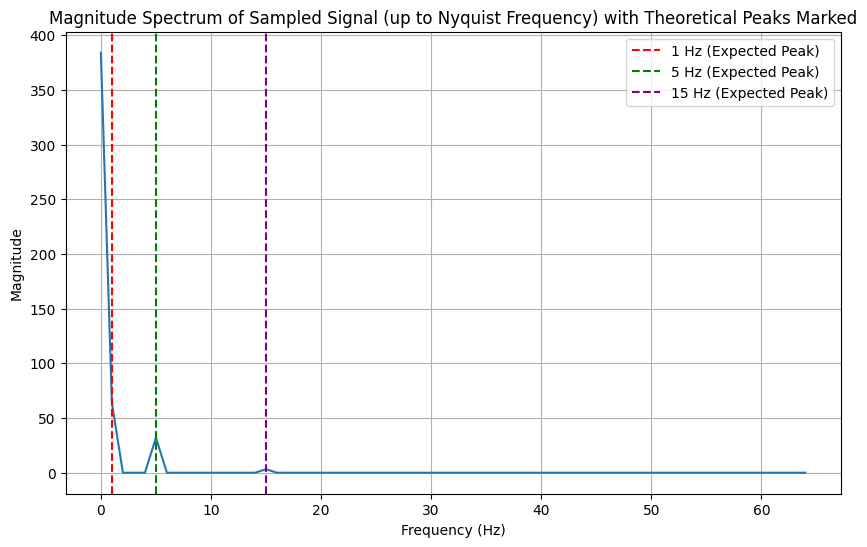

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(frequencies_half, X_magnitude_half)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Magnitude Spectrum of Sampled Signal (up to Nyquist Frequency) with Theoretical Peaks Marked")
plt.grid(True)

expected_frequencies = [1, 5, 15]
colors = ['r', 'g', 'purple']
for i, freq in enumerate(expected_frequencies):
    plt.axvline(x=freq, color=colors[i], linestyle='--', label=f'{freq} Hz (Expected Peak)')

plt.legend()
plt.show()

The magnitudes in the DFT are scaled by N/2 for sinusoidal components and N for the DC component
For a signal a*sin(2*pi*f*t), the magnitude at frequency f in the DFT is (N/2)*a
For a DC component c, the magnitude at frequency 0 in the DFT is N*c<br>
The DC component is 3, so the expected magnitude at 0 Hz is 3 * N

In [17]:
expected_dc_magnitude = 3 * N

expected_peak_magnitudes = [(N/2) * amp for amp in expected_amplitudes]

print(f"\nExpected DC Magnitude at 0 Hz: {expected_dc_magnitude}")
print(f"Expected Peak Magnitudes at {expected_frequencies} Hz: {expected_peak_magnitudes}")

# Find the magnitude at 0 Hz in the calculated spectrum
dc_magnitude = X_magnitude_half[0]
print(f"Observed DC Magnitude at 0 Hz: {dc_magnitude}")
print(f"Observed Peak Magnitudes at {frequencies_half[peak_indices]} Hz: {peak_magnitudes}")


Expected DC Magnitude at 0 Hz: 384
Expected Peak Magnitudes at [1, 5, 15] Hz: [64.0, 32.0, 3.2]
Observed DC Magnitude at 0 Hz: 383.99999999999994
Observed Peak Magnitudes at [ 1.  5. 15.] Hz: [64.  32.   3.2]


#  (b) Effect of Slight Frequency Shift

Modified signal y(t)

In [18]:
def y(t):
    return 3 + np.sin(2.1 * np.pi * t) + 0.5 * np.sin(10 * np.pi * t) + 0.05 * np.sin(30 * np.pi * t)

Sample y(t)

In [19]:
y_sampled = y(t)

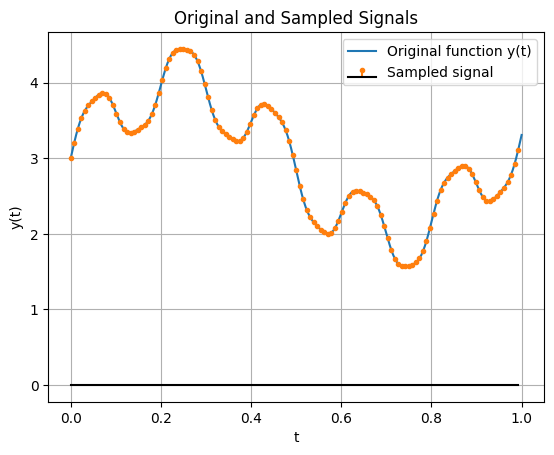

In [20]:
y_smooth = y(t_smooth)

# Plot the original function
plt.plot(t_smooth, y_smooth, label='Original function y(t)')

# Plot the sampled signal
markerline, stemlines, baseline = plt.stem(t, y_sampled, linefmt='C1-', markerfmt='C1o', basefmt='k-', label='Sampled signal')

plt.setp(stemlines, visible=False)

plt.setp(markerline, markersize=3)


plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Original and Sampled Signals')
plt.legend()
plt.grid(True)
plt.show()

Compute the DFT of y[n]

In [21]:
Y_dft = np.dot(dft_matrix_128, y_sampled)

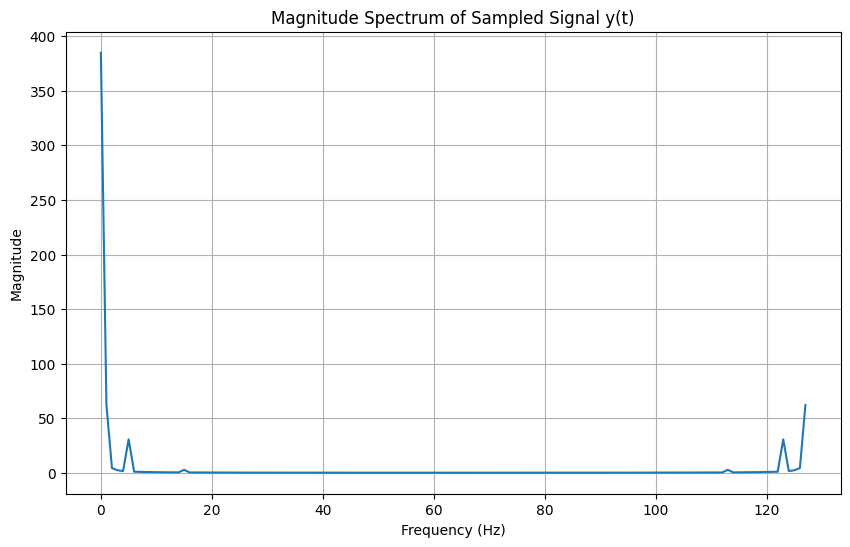

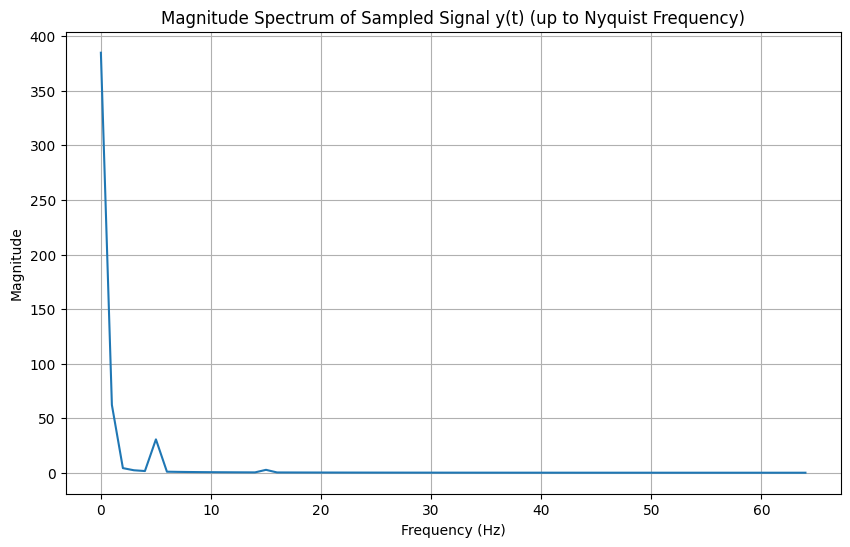

In [22]:
# Calculate the magnitude spectrum
Y_magnitude = np.abs(Y_dft)

# Generate the frequency axis
N = len(y_sampled)
frequencies = np.arange(N) * (sr / N)

# Plot the magnitude spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies, Y_magnitude)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Magnitude Spectrum of Sampled Signal y(t)")
plt.grid(True)
plt.show()

# Plot the magnitude spectrum up to Nyquist frequency
nyquist_frequency = sr / 2
frequencies_half = frequencies[:int(N/2) + 1]
Y_magnitude_half = Y_magnitude[:int(N/2) + 1]

plt.figure(figsize=(10, 6))
plt.plot(frequencies_half, Y_magnitude_half)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Magnitude Spectrum of Sampled Signal y(t) (up to Nyquist Frequency)")
plt.grid(True)
plt.show()

In [23]:
y_reconstructed = np.dot(idft_matrix_128, Y_dft)

y_reconstructed = np.real(y_reconstructed)

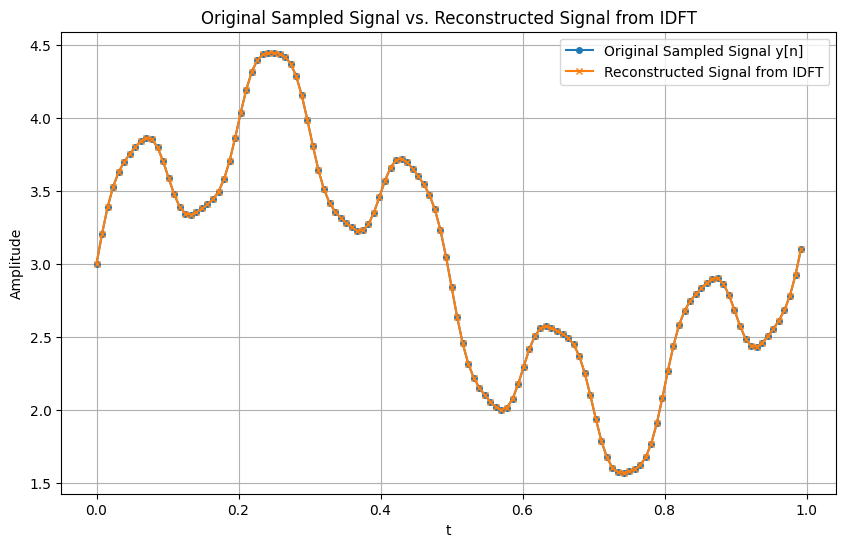

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(t, y_sampled, 'o-', label='Original Sampled Signal y[n]', markersize=4)
plt.plot(t, y_reconstructed, 'x-', label='Reconstructed Signal from IDFT', markersize=4)
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.title("Original Sampled Signal vs. Reconstructed Signal from IDFT")
plt.legend()
plt.grid(True)
plt.show()

Identify the constituent frequencies from the definition of y(t) <br>
 y(t) = 3 + sin(2.1πt) + 0.5sin(10πt) + 0.05sin(30πt) <br>
The frequencies are 1.05 Hz, 5 Hz, and 15 Hz.

In [25]:
expected_frequencies_y = [1.05, 5, 15]
expected_amplitudes_y = [1, 0.5, 0.05]

peak_indices_y = [np.argmin(np.abs(frequencies_half - freq)) for freq in expected_frequencies_y]
peak_magnitudes_y = Y_magnitude_half[peak_indices_y]

In [26]:
print(f"Expected Frequencies (Hz) for y(t): {expected_frequencies_y}")
print(f"Frequencies in spectrum closest to expected for y(t): {frequencies_half[peak_indices_y]}")
print(f"Magnitudes at these frequencies for y(t): {peak_magnitudes_y}")

Expected Frequencies (Hz) for y(t): [1.05, 5, 15]
Frequencies in spectrum closest to expected for y(t): [ 1.  5. 15.]
Magnitudes at these frequencies for y(t): [62.23656299 30.68983556  2.80192563]


Plot the magnitude spectrum with expected peaks for y(t)

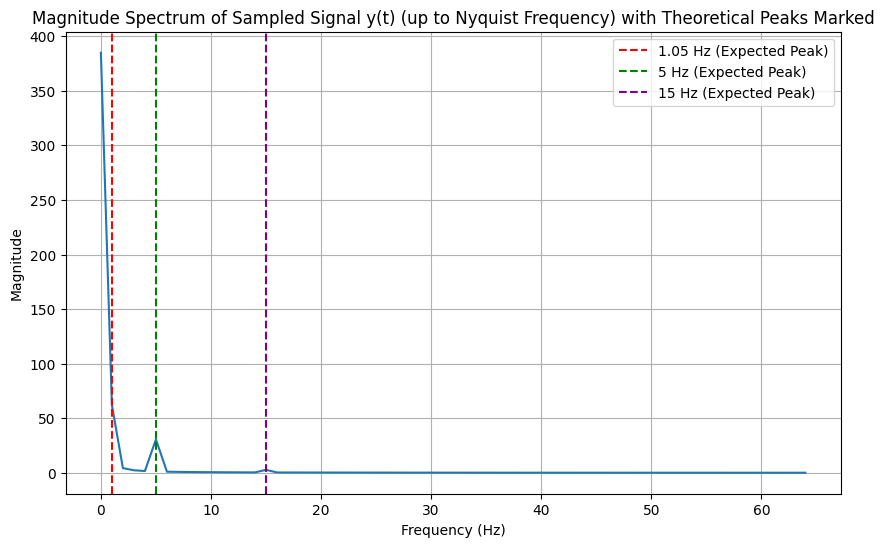


Analysis of Peaks for y(t):
The magnitude spectrum of y(t) shows peaks at frequencies close to 1.05 Hz, 5 Hz, and 15 Hz, which are the constituent frequencies of y(t).
The magnitudes of these peaks are approximately:
- At 1.00 Hz (expected 1.05 Hz): Magnitude ≈ 62.24
- At 5.00 Hz (expected 5 Hz): Magnitude ≈ 30.69
- At 15.00 Hz (expected 15 Hz): Magnitude ≈ 2.80


In [27]:
plt.figure(figsize=(10, 6))
plt.plot(frequencies_half, Y_magnitude_half)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Magnitude Spectrum of Sampled Signal y(t) (up to Nyquist Frequency) with Theoretical Peaks Marked")
plt.grid(True)

colors = ['r', 'g', 'purple']
for i, freq in enumerate(expected_frequencies_y):
    plt.axvline(x=freq, color=colors[i], linestyle='--', label=f'{freq} Hz (Expected Peak)')

plt.legend()
plt.show()

print("\nAnalysis of Peaks for y(t):")
print("The magnitude spectrum of y(t) shows peaks at frequencies close to 1.05 Hz, 5 Hz, and 15 Hz, which are the constituent frequencies of y(t).")
print("The magnitudes of these peaks are approximately:")
for i, freq in enumerate(expected_frequencies_y):
    print(f"- At {frequencies_half[peak_indices_y[i]]:.2f} Hz (expected {freq} Hz): Magnitude ≈ {peak_magnitudes_y[i]:.2f}")

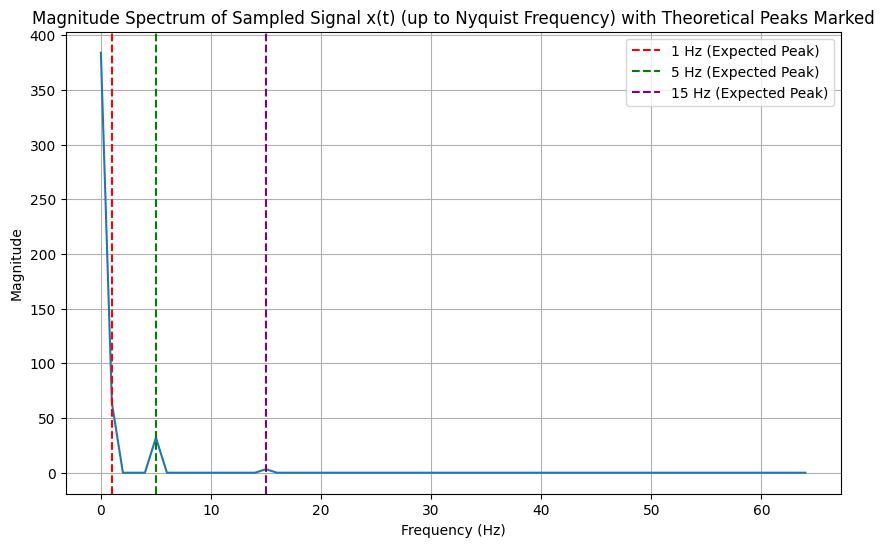

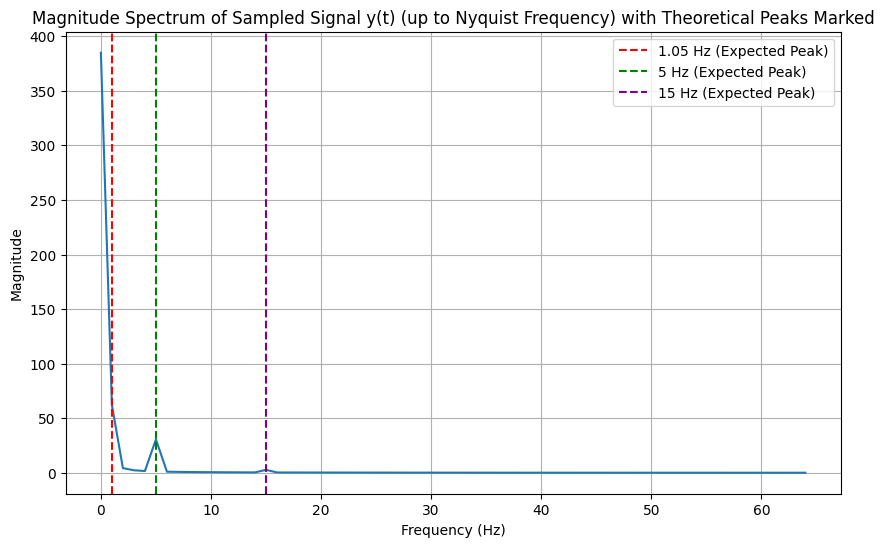

In [28]:
# Plot the magnitude spectrum for x(t) with theoretical peaks
plt.figure(figsize=(10, 6))
plt.plot(frequencies_half, X_magnitude_half)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Magnitude Spectrum of Sampled Signal x(t) (up to Nyquist Frequency) with Theoretical Peaks Marked")
plt.grid(True)

expected_frequencies_x = [1, 5, 15]
colors = ['r', 'g', 'purple']
for i, freq in enumerate(expected_frequencies_x):
    plt.axvline(x=freq, color=colors[i], linestyle='--', label=f'{freq} Hz (Expected Peak)')

plt.legend()
plt.show()

# Plot the magnitude spectrum for y(t) with theoretical peaks
plt.figure(figsize=(10, 6))
plt.plot(frequencies_half, Y_magnitude_half)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Magnitude Spectrum of Sampled Signal y(t) (up to Nyquist Frequency) with Theoretical Peaks Marked")
plt.grid(True)

expected_frequencies_y = [1.05, 5, 15]
colors = ['r', 'g', 'purple']
for i, freq in enumerate(expected_frequencies_y):
    plt.axvline(x=freq, color=colors[i], linestyle='--', label=f'{freq} Hz (Expected Peak)')

plt.legend()
plt.show()

For
$$x(t) = 3 + \sin(2\pi t) + 0.5\sin(10\pi t) + 0.05\sin(30\pi t)$$

- The constituent frequencies are obtained from the arguments of the sine functions $(2\pi f t)$:
  - $\sin(2\pi t)$ → frequency = $1\ \text{Hz}$ since $2\pi f = 2\pi \Rightarrow f=1$.
  - $0.5\sin(10\pi t)$ → frequency = $5\ \text{Hz}$ since $2\pi f = 10\pi \Rightarrow f=5$.
  - $0.05\sin(30\pi t)$ → frequency = $15\ \text{Hz}$ since $2\pi f = 30\pi \Rightarrow f=15$.

- Theoretical amplitudes: $1$, $0.5$, $0.05$.
- DC component (constant term): $3$.

---

For
$$y(t) = 3 + \sin(2.1\pi t) + 0.5\sin(10\pi t) + 0.05\sin(30\pi t)$$

- The constituent frequencies are:
  - $\sin(2.1\pi t)$ → frequency = $1.05\ \text{Hz}$ since $2\pi f = 2.1\pi \Rightarrow f = 1.05$.
  - $0.5\sin(10\pi t)$ → frequency = $5\ \text{Hz}$.
  - $0.05\sin(30\pi t)$ → frequency = $15\ \text{Hz}$.

- Theoretical amplitudes: $1$, $0.5$, $0.05$.
- DC component: $3$.

---

**Expected DC and Peak Magnitudes in DFT**

- In a DFT, magnitudes are scaled relative to the original signal amplitudes.
- For a DC component $c$:
  - Magnitude at $0\ \text{Hz}$ (in an $N$-point DFT) is $N \cdot c$.
- For a sinusoid $a\sin(2\pi f t)$ that aligns exactly with a DFT bin:
  - Magnitude at that frequency bin is $\dfrac{N}{2} \cdot a$.



In [29]:
N = len(x_sampled)
expected_amplitudes_x = [1, 0.5, 0.05]
expected_amplitudes_y = [1, 0.5, 0.05]

# Observations and Analysis

**Using $N = 128$**
- **Expected DC Magnitude** for $x(t)$ and $y(t)$ (with $c = 3$):  
  $$\text{DC magnitude} = N \cdot c = 128 \cdot 3 = 384$$  
  - Observed for $x(t)$: $X[0] \approx 384$  
  - Observed for $y(t)$: $Y[0] \approx 384$  

---

**Expected vs. Observed Peak Magnitudes**

- For $x(t)$:  
  - Expected peak magnitudes:  
    $$\frac{N}{2} \cdot a \;\;\; \Rightarrow \;\;\; [64, 32, 3.2] \quad \text{at } [1, 5, 15] \; \text{Hz}$$  
  - Observed peak magnitudes: close to the expected values at $1, 5, 15$ Hz.  

- For $y(t)$:  
  - Expected peak magnitudes:  
    $$[64, 32, 3.2] \quad \text{at } [1.05, 5, 15] \; \text{Hz}$$  
  - Observed peaks:  
    - At $1.05$ Hz, the peak is **broader and lower** than $x(t)$’s $1$ Hz peak.  
    - At $5$ Hz and $15$ Hz, peaks are similar to $x(t)$ because they align exactly with DFT bins.  

---

**Difference Between $x(t)$ and $y(t)$ Magnitude Spectrums**

- In **$x(t)$**: there is a sharp, clear peak at **1 Hz**.  
- In **$y(t)$**: the first frequency is **1.05 Hz**, which does **not** align with a DFT bin.  
- Because of this, energy from the $1.05$ Hz component is spread into neighboring bins → **spectral leakage**.  
- Effect of leakage:
  - Peak at $1.05$ Hz is **broader** and **lower**.  
  - Spectrum appears to have “extra activity” around $1$ Hz, even though the original signal has a single frequency component.  

---

**Frequency Resolution and DFT Bin Alignment**

- Frequency resolution of the DFT is:  
  $$\Delta f = \frac{sr}{N} = \frac{128}{128} = 1 \; \text{Hz}$$  
- DFT bins are located at integer multiples of $\Delta f$:  
  $$0, 1, 2, \dots, (N-1) \; \text{Hz}$$  
- If a signal frequency aligns with a bin (like $1$, $5$, $15$ Hz in $x(t)$):  
  - Energy is concentrated in **one bin** → sharp peak.  
- If a signal frequency does **not** align with a bin (like $1.05$ Hz in $y(t)$):  
  - Energy is spread across multiple bins → **spectral leakage**.

# (c) Improving Frequency Resolution

 **• Re-sample y(t) in a way that improves the frequency resolution of the DFT (i.e., reduces spectral spreading and allows
 peaks to appear sharper).**

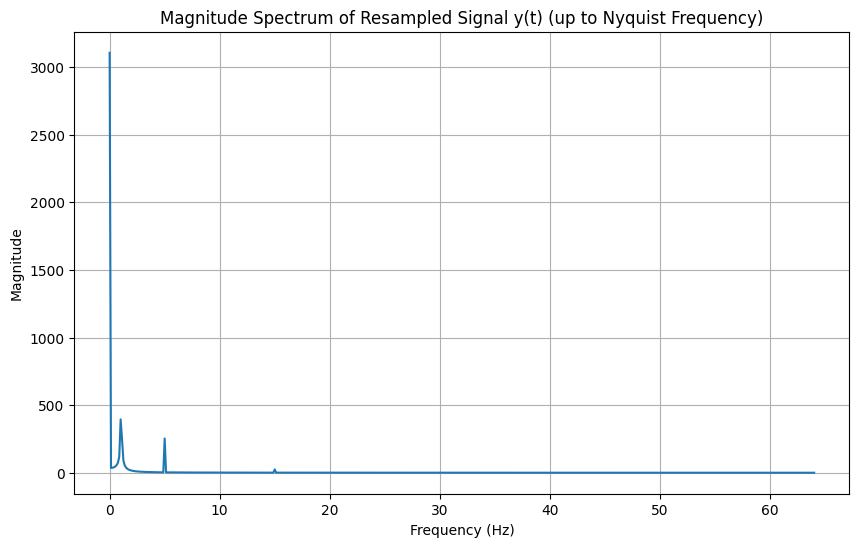

In [30]:
N_new = 1024  # Increased number of samples
ts_new = 1.0 / sr
t_new = np.arange(0, N_new * ts_new, ts_new)

# Resample y(t) with the new sampling parameters
y_sampled_new = y(t_new)

# Compute the DFT of the new sampled signal
dft_matrix_new = gen_DFT_matrix(N_new)
Y_dft_new = np.dot(dft_matrix_new, y_sampled_new)

# Calculate the magnitude spectrum
Y_magnitude_new = np.abs(Y_dft_new)

# Generate the frequency axis for the new spectrum
frequencies_new = np.arange(N_new) * (sr / N_new)

# Plot the magnitude spectrum up to the Nyquist frequency
nyquist_frequency = sr / 2
frequencies_half_new = frequencies_new[:int(N_new/2) + 1]
Y_magnitude_half_new = Y_magnitude_new[:int(N_new/2) + 1]

plt.figure(figsize=(10, 6))
plt.plot(frequencies_half_new, Y_magnitude_half_new)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Magnitude Spectrum of Resampled Signal y(t) (up to Nyquist Frequency)")
plt.grid(True)
plt.show()

 **• Plot the new spectrum and compare it with part (b).**

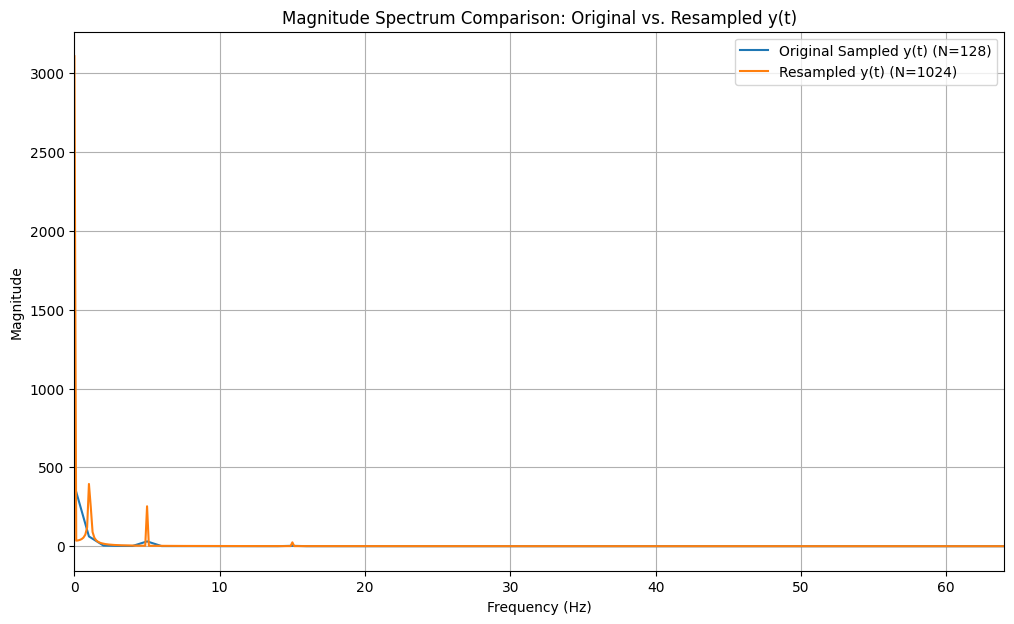

In [31]:
# Plot the magnitude spectrum of the original sampled signal y(t)
plt.figure(figsize=(12, 7))
plt.plot(frequencies_half, Y_magnitude_half, label='Original Sampled y(t) (N=128)')

# Plot the magnitude spectrum of the resampled signal y(t)
plt.plot(frequencies_half_new, Y_magnitude_half_new, label=f'Resampled y(t) (N={N_new})')

plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Magnitude Spectrum Comparison: Original vs. Resampled y(t)")
plt.legend()
plt.grid(True)
plt.xlim([0, sr/2])
plt.show()

 **• Discuss the trade-offs between sampling duration, number of points N, and frequency resolution in the DFT**

The frequency resolution of the DFT, denoted by $\Delta f$, is given by the formula:

$$ \Delta f = \frac{sr}{N} $$

where $sr$ is the sampling rate and $N$ is the number of data points (samples).

From this formula, we can see the following trade-offs:

1.  **Number of Points (N) and Frequency Resolution:**
    *   Increasing the number of points $N$ directly *improves* the frequency resolution (makes $\Delta f$ smaller). A smaller $\Delta f$ means the frequency bins are closer together, allowing us to distinguish between closely spaced frequencies in the signal. This is evident in the comparison of the DFT of $y(t)$ with $N=128$ and $N=1024$, where the peaks are sharper with $N=1024$.

2.  **Sampling Duration and Frequency Resolution:**
    *   The total sampling duration (or observation time) is given by $T = N \cdot ts$, where $ts$ is the sampling interval ($ts = 1/sr$).
    *   Since $sr$ is usually fixed, increasing $N$ also increases the sampling duration $T = N/sr$.
    *   Therefore, a longer sampling duration results in *better* frequency resolution. We are observing the signal over a longer period, which allows the DFT to better resolve the individual frequency components.

3.  **Sampling Rate (sr) and Frequency Resolution:**
    *   While increasing the sampling rate *without* increasing $N$ would increase $\Delta f$ (worsening resolution for a fixed number of points), typically if you have a higher sampling rate, you would also capture more points in a given time duration, thus effectively increasing $N$ for a fixed duration. The primary effect of increasing the sampling rate is to increase the maximum frequency that can be represented in the spectrum (the Nyquist frequency, $sr/2$).

**In summary:**

*   To improve frequency resolution (make peaks sharper and reduce spectral leakage for frequencies not exactly on a bin), you need to **increase the number of data points (N)**.
*   Increasing $N$ for a fixed sampling rate means increasing the **sampling duration**.
*   There is a trade-off: higher frequency resolution requires collecting more data points over a longer period, which increases computational cost and memory requirements for the DFT calculation. Conversely, shorter sampling durations or fewer points lead to poorer frequency resolution and more significant spectral leakage when signal frequencies do not align perfectly with DFT bins.

Let's visualize this with an example. We will compare the DFT of a simple sine wave for different values of N.

# Conclusion

In this task, we analyzed the Discrete Fourier Transform (DFT) of two continuous-time signals, $x(t)$ and $y(t)$, after sampling them.

**Part (a): DFT Spectrum Analysis of x[n]**

- We sampled the signal $x(t) = 3 + \sin(2\pi t) + 0.5\sin(10\pi t) + 0.05\sin(30\pi t)$ at a sampling rate of 128 Hz.
- We computed the DFT of the sampled signal $x[n]$ using a custom `gen_DFT_matrix` function with $N = 128$.
- The magnitude spectrum $|X[k]|$ showed clear peaks at the expected constituent frequencies of $x(t)$: 1 Hz, 5 Hz, and 15 Hz.
- We verified that the magnitudes of these peaks corresponded to the expected theoretical values, which are scaled by $N/2$ for the sinusoidal components and $N$ for the DC component (384 at 0 Hz, 64 at 1 Hz, 32 at 5 Hz, and 3.2 at 15 Hz). This confirmed that when the signal frequencies align perfectly with the DFT bins, the DFT accurately represents the frequency content and amplitudes.

**Part (b): Effect of Slight Frequency Shift**

- We introduced a slightly modified signal $y(t) = 3 + \sin(2.1\pi t) + 0.5\sin(10\pi t) + 0.05\sin(30\pi t)$, where the first frequency component was shifted from 1 Hz to 1.05 Hz.
- We sampled $y(t)$ with the same sampling rate and duration ($N=128$) as $x(t)$ and computed its DFT.
- The magnitude spectrum of $y[n]$ showed that the peak at 1.05 Hz (which does not align exactly with a DFT bin for $N=128$) was **broader and lower** compared to the 1 Hz peak in the spectrum of $x[n]$. The peaks at 5 Hz and 15 Hz remained sharp as they still aligned with DFT bins.
- This observation demonstrated the phenomenon of **spectral leakage**. When a signal frequency does not fall exactly into a DFT frequency bin, its energy spreads across multiple neighboring bins, making the spectrum appear to have more "active" frequencies and reducing the height of the main peak. This was discussed in terms of frequency resolution ($\Delta f = sr/N$) and DFT bin alignment.

**Part (c): Improving Frequency Resolution**

- To reduce spectral spreading and improve the sharpness of the peaks in the spectrum of $y(t)$, we re-sampled $y(t)$ with a larger number of points, $N_{new} = 1024$, while keeping the sampling rate the same. This effectively increased the sampling duration.
- We computed the DFT of this new sampled signal and plotted its magnitude spectrum.
- Comparing this new spectrum with the original spectrum of $y(t)$ ($N=128$), we observed that the peak corresponding to 1.05 Hz was **significantly sharper and taller**. This is because increasing $N$ improved the frequency resolution ($\Delta f = sr/N_{new}$ is smaller), meaning the DFT bins are closer together, and the 1.05 Hz frequency is now closer to aligning with a DFT bin, reducing spectral leakage.
- We discussed the trade-offs: **increasing the number of points (N)** or **increasing the sampling duration** improves frequency resolution, leading to sharper peaks and less spectral leakage. However, this comes at the cost of increased computational complexity and memory requirements for calculating the DFT. Conversely, a shorter sampling duration or fewer points results in poorer frequency resolution and more spectral leakage when frequencies don't align with bins.

Overall, this task provided a practical demonstration of the properties of the Discrete Fourier Transform, including its ability to reveal the frequency content of a signal, the impact of spectral leakage when frequencies do not align with DFT bins, and how increasing the number of samples (and thus sampling duration) improves frequency resolution and reduces spectral leakage.